In [2]:
import numpy as np
import matplotlib.pyplot as plt
#  从指定路径文件中加载数据
def load_data(path):
    rating_mat = np.zeros((943, 1682))     # 初始化评分矩阵
    f = open(path)
    for line in f.readlines():
        nums = line.split("\t")                       # 按制表符划分
        nums = [int(x) for x in nums]                 # 转化为数字
        rating_mat[nums[0]-1][nums[1]-1] = nums[2]
    f.close()
    return rating_mat
    
    

In [3]:
#  固定 Q 更新 P 
def gradient(P, Q, R, lamb):
    row = P.shape[0]
    for u in range(row):
        b = R[u] != 0
        n = R[u].sum()
        P[u] = np.linalg.pinv(Q[b].T.dot(Q[b]) + lamb).dot(Q.T.dot(R[u].reshape(1,-1).T)).ravel()
    return P

In [4]:
# 计算均方根误差
def Loss(P, Q, R):
    b = R != 0
    loss = np.sqrt(((R[b] - (P.dot(Q.T))[b])** 2).mean())
    return loss

In [5]:
# 交替最小二乘
def ALS(R_train, R_val):
    K = 20             # 潜在特征数
    lamb = 149011611938476.56         # 正则化参数
    iterations = 20    # 训练轮数
    loss_train = []
    loss_val = []
    n_user, n_item = R_train.shape
    np.random.normal
    P = np.random.normal(0,0.1,(n_user, K))
    Q = np.random.normal(0,0.1,(n_item, K))
    for i in range(iterations):
        P = gradient(P, Q, R_train, lamb)
        Q = gradient(Q, P, R_train.T, lamb)
        loss_t = Loss(P, Q, R_train)
        loss_train.append(loss_t)
        loss_v = Loss(P, Q, R_val)
        loss_val.append(loss_v)
    return loss_train,loss_val

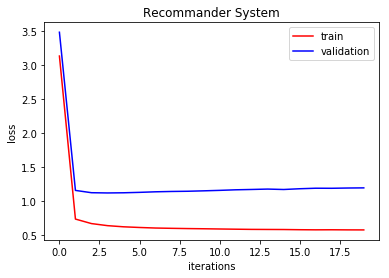

In [6]:
R_train = load_data("ml-100k/u2.base")
R_val = load_data("ml-100k/u2.test")
loss_train, loss_val = ALS(R_train, R_val)
x = len(loss_train)
plt.figure()
plt.title("Recommander System")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.plot(range(x), loss_train, "r",label="train")
plt.plot(range(x), loss_val, "b",label="validation")
plt.legend(loc="upper right")
plt.show()